# Imports and loading data

In [18]:
#Basics
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for aesthetics
sns.set(style = 'darkgrid', font_scale = 1.4)

In [17]:
# Load the data
df = pd.read_csv('../raw_data/train.csv')
df_test = pd.read_csv('../raw_data/test.csv')

# Data

In [24]:
print(f'Train set shape: {df.shape}')
print(f'Test set shape: {df_test.shape}')
df.head()

Train set shape: (8693, 14)
Test set shape: (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Feature Descriptions:**

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Exploring Missing Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [25]:
print('Train set missing values:')
df.isna().sum()

Train set missing values:


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [27]:
print('Test set missing values:')
df_test.isna().sum()

Test set missing values:


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

### Comparing missing values between train and test sets:

In [76]:
train_missing_percentage = (df.isna().sum()/df.count())*100
test_missing_percentage = (df_test.isna().sum()/df_test.count())*100
missing_difference = abs(train_missing_percentage - test_missing_percentage)

pd.concat([train_missing_percentage, test_missing_percentage, missing_difference], 
          axis = 1).rename(columns = {0:'Train NA %', 1:'Test NA %', 2:'Difference %'})

,Train NA %,Test NA %,Difference %
PassengerId,0.000000,0.000000,0.000000
HomePlanet,2.366934,2.076372,0.290561
CryoSleep,2.560170,2.222753,0.337417
Cabin,2.342830,2.394063,0.051232
Destination,2.138409,2.198327,0.059918
Age,2.102420,2.173913,0.071493
VIP,2.391048,2.222753,0.168295
RoomService,2.126410,1.954708,0.171702
FoodCourt,2.150411,2.541357,0.390946
ShoppingMall,2.451385,2.345059,0.106326


## Data Visualization

### Basic data visualization of categorical features.

What we are looking for here are interesting correlations between the target and the categorical features. 

'CryoSleep' looks like a promising feature:

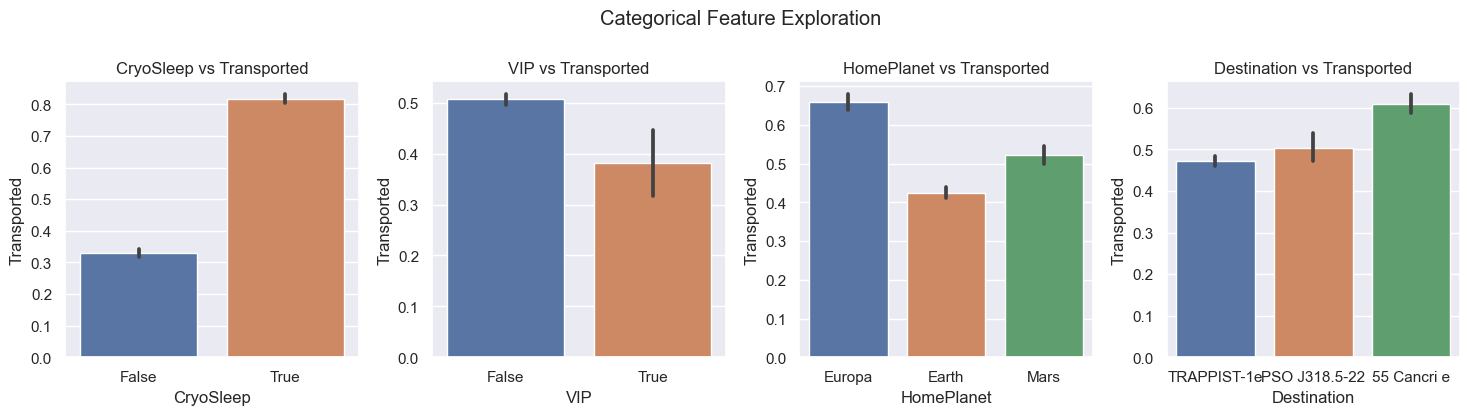

In [8]:
plt.figure(figsize=(18,4))

plt.subplot(1,4,1)
sns.barplot(x = 'CryoSleep', y = 'Transported', data = df)
plt.title('CryoSleep vs Transported')

plt.subplot(1,4,2)
sns.barplot(x = 'VIP', y = 'Transported', data = df)
plt.title('VIP vs Transported')

plt.subplot(1,4,3) 
sns.barplot(x = 'HomePlanet', y = 'Transported', data = df)
plt.title('HomePlanet vs Transported')

plt.subplot(1,4,4)
sns.barplot(x = 'Destination', y = 'Transported', data = df)
plt.title('Destination vs Transported')

plt.subplots_adjust(top = 0.80, wspace = 0.25)

plt.suptitle('Categorical Feature Exploration')
plt.show()

We know from the dataset description that 'Cabin' takes the form *deck/num/side*, where side can be either P for *Port* or S for *Starboard*.

Hence, in order to explore possible correlations in that area, we need to split the information into three more columns:

In [9]:
# .fillna('NA/NA/NA') ensures that we don't get an error when applying the .split or indexing. 

df['Side'] = df['Cabin'].fillna('NA/NA/NA').apply(lambda x: x.split('/')[2])
df['Number'] = df['Cabin'].fillna('NA/NA/NA').apply(lambda x: x.split('/')[1])
df['Deck'] = df['Cabin'].fillna('NA/NA/NA').apply(lambda x: x.split('/')[0])

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Side,Number,Deck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P,0,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S,0,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S,0,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S,0,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S,1,F


In [10]:
# How many passengers in each side?
df.groupby('Side').count()['PassengerId']

Side
NA     199
P     4206
S     4288
Name: PassengerId, dtype: int64

In [11]:
# How many passengers in each deck?
df.groupby('Deck').count()['PassengerId']

Deck
A      256
B      779
C      747
D      478
E      876
F     2794
G     2559
NA     199
T        5
Name: PassengerId, dtype: int64

In [12]:
df['Number'].nunique()

1818

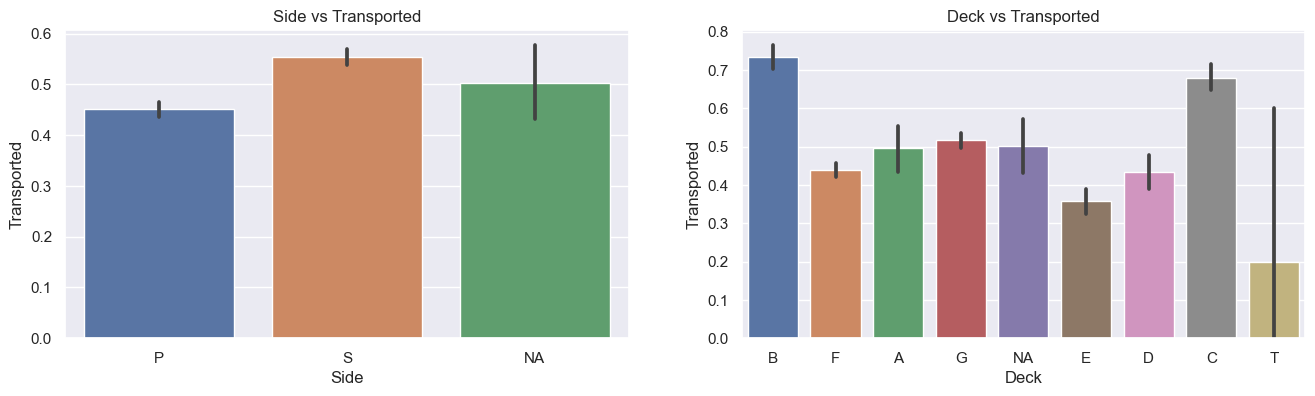

In [13]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.barplot(x = 'Side', y = 'Transported', data = df)
plt.title('Side vs Transported')

plt.subplot(1,2,2)
sns.barplot(x = 'Deck', y = 'Transported', data = df)
plt.title('Deck vs Transported')

plt.show()

<AxesSubplot: xlabel='Deck', ylabel='VIP'>

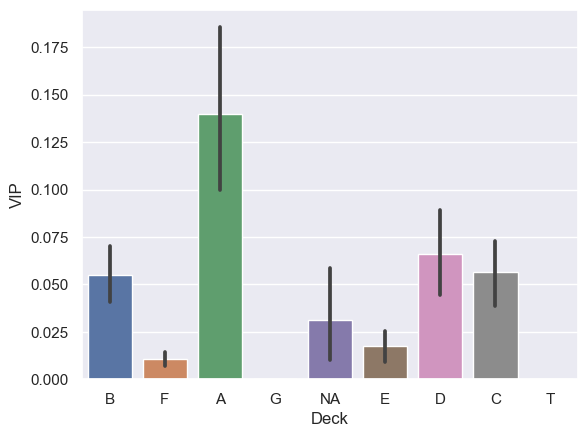

In [14]:
sns.barplot(x = 'Deck', y ='VIP', data = df)

In [15]:
sns.barplot(x = 'Deck', y = 'Destination', data = df)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
sns.catplot(data = df, y = 'Age', x = 'Transported', hue = 'VIP', kind = 'violin')

In [ ]:
sns.histplot(data = df, x = 'RoomService', bins = 20)

In [ ]:
sns.histplot(data = df[df['RoomService'] < 500], x = 'RoomService', bins = 20)

In [ ]:
df['CleanRoomService'] = df['RoomService'].apply(lambda x: 'paid' if x > 0 else 'not_paid')
sns.barplot(data = df, x = 'CleanRoomService', y = 'Transported')

In [ ]:
sns.scatterplot(data = df, x = 'RoomService', y = 'FoodCourt')

In [ ]:
sns.catplot(data = df[df['RoomService'] < 2500], y = 'RoomService', x = 'Transported', kind = 'boxen')
sns.catplot(data = df[df['FoodCourt'] < 2500], y = 'FoodCourt', x = 'Transported', kind = 'boxen')

plt.show()